In [1]:
##Libraries Imported

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt
import joblib

### Preprocessing data & EDA

In [2]:
df = pd.read_csv('/content/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
print(df.shape)
print(df.info())
print(df.describe())

(30, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
None
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


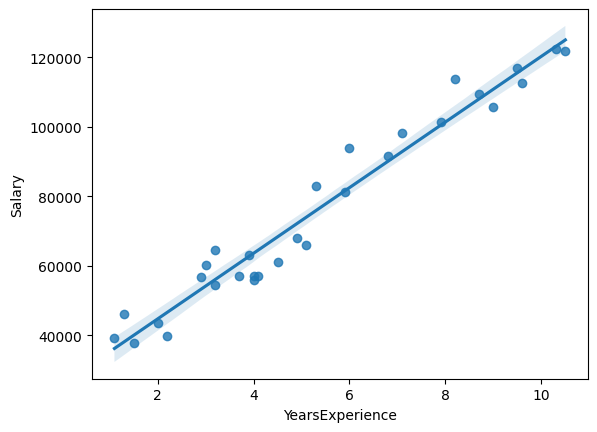

In [15]:
##Finding the insights

sns.regplot(x='YearsExperience', y='Salary', data=df)
plt.savefig('regplot.png')

### Inference = As the Years of Experince increases the Salary also increases

### Model Planning

In [5]:
X = df['YearsExperience'].values.reshape(-1,1)
y = df['Salary'].values.reshape(-1,1)

In [6]:
%%time
model = LinearRegression()
model_fit = model.fit(X, y)
print(model_fit)

LinearRegression()
CPU times: user 3.73 ms, sys: 795 µs, total: 4.53 ms
Wall time: 17.4 ms


In [7]:
coef = model_fit.coef_
print("The coef of the data is: ", coef)

The coef of the data is:  [[9449.96232146]]


In [8]:
intercept = model_fit.intercept_
print("The intercept of the data is: ", intercept)

The intercept of the data is:  [25792.20019867]


In [10]:
pred = np.round(model_fit.predict(X),3)
print("The predicted values are: ",pred)

The predicted values are:  [[ 36187.159]
 [ 38077.151]
 [ 39967.144]
 [ 44692.125]
 [ 46582.117]
 [ 53197.091]
 [ 54142.087]
 [ 56032.08 ]
 [ 56032.08 ]
 [ 60757.061]
 [ 62647.053]
 [ 63592.049]
 [ 63592.049]
 [ 64537.046]
 [ 68317.031]
 [ 72097.016]
 [ 73987.008]
 [ 75877.001]
 [ 81546.978]
 [ 82491.974]
 [ 90051.944]
 [ 92886.933]
 [100446.903]
 [103281.891]
 [108006.872]
 [110841.861]
 [115566.842]
 [116511.838]
 [123126.812]
 [125016.805]]


In [11]:
###New dastset with predicted data

new_dataset = pd.concat([df, pd.DataFrame(pred, columns=['Predicted Salary'])], axis=1)
new_dataset.to_csv('new_dataset.csv', index=False)
new_dataset

,YearsExperience,Salary,Predicted Salary
0,1.1,39343.0,36187.159
1,1.3,46205.0,38077.151
2,1.5,37731.0,39967.144
3,2.0,43525.0,44692.125
4,2.2,39891.0,46582.117
5,2.9,56642.0,53197.091
6,3.0,60150.0,54142.087
7,3.2,54445.0,56032.080
8,3.2,64445.0,56032.080
9,3.7,57189.0,60757.061


In [13]:
### check r2_score, mean_squared_error

r2score =round(r2_score(y, pred), 3)
print("The accuracy of the model over the data is: ", r2score)
mse = round(sqrt(mean_squared_error(y, pred)),3 )
print("The error produced by the model over the data is: ", mse, "currency units")


The accuracy of the model over the data is:  0.957
The error produced by the model over the data is:  5592.044 currency units


In [14]:
reg_model = joblib.dump(model_fit, 'model.pkl')
reg_model

['model.pkl']